In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer.data import import_records
from techminer.features import process_records

import_records(source="../data/tmp/debug-scopus.csv", filetype="scopus", directory="../data/processed/debug")
# process_records(directory="../data/processed/debug")

# wos_df = load_file(filepath="techminer/tests/data/savedrecs.txt", filetype="wos", datastorepath="./datastore")
# dim_df = load_file(filepath="techminer/tests/data/dimensions.csv", filetype="dimensions", datastorepath="./datastore")

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer.data import coverage 

coverage(directory_or_records="../data/processed/debug")

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer.query import count_documents_by_term  
from techminer.query import count_documents_by_year
from techminer.query import count_global_citations_by_term
from techminer.query import count_global_citations_by_year
from techminer.query import count_local_citations_by_term
from techminer.query import count_local_citations_by_year
from techminer.query import mean_global_citations_by_year
from techminer.query import mean_local_citations_by_year
from techminer.query import top_documents
# ---
from techminer.visualization import worldmap

# top_documents(directory_or_records="../data/processed/debug")
# count_documents_by_term(directory_or_records="../data/processed/debug", column='authors')
# count_documents_by_year(directory_or_records="../data/processed/debug")
# count_local_citations_by_term(directory_or_records="../data/processed/debug", column='authors')
# count_global_citations_by_term(directory_or_records="../data/processed/debug", column='authors')
# count_local_citations_by_year(directory_or_records="../data/processed/debug")
# count_global_citations_by_year(directory_or_records="../data/processed/debug")
# mean_global_citations_by_year(directory_or_records="../data/processed/debug")
# ---


num_documents_by_country = count_documents_by_term(directory_or_records="../data/processed/debug", column='countries')
worldmap(num_documents_by_country)



/workspaces/techminer-sklearn/techminer/query/counts.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  records[column] = records[column].str.split(sep)


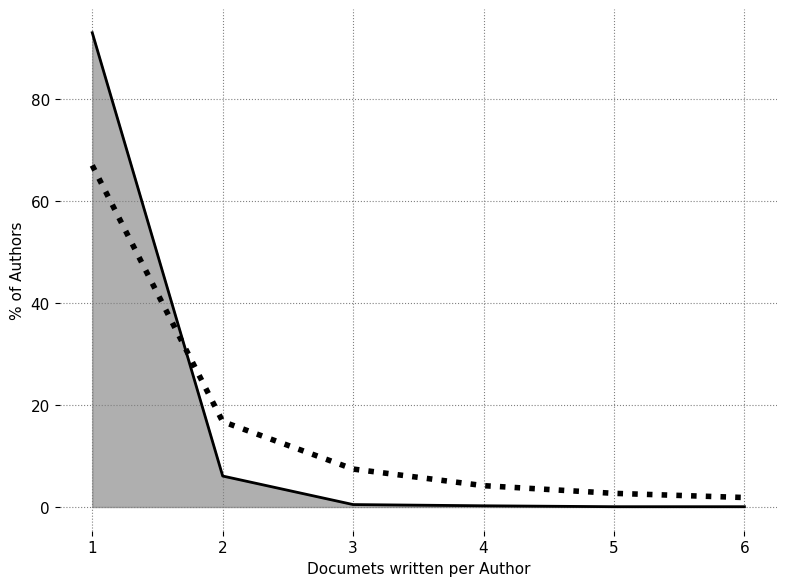

In [1]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer.analysis import core_sources
from techminer.analysis import core_authors
from techminer.visualization import lotka

# core_sources(directory_or_records="../data/processed/debug")
x = core_authors(directory_or_records="../data/processed/debug")
lotka(x)

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)


from techminer.visualization import bradford

bradford(directory_or_records="../data/processed/debug")

In [ ]:
import pandas as pd

from techminer.data.records import load_records

load_records(directory="../data/processed/debug").columns

In [ ]:
from src.features.apply_keywords_thesaurus import apply_keywords_thesaurus
from src.features.apply_institutions_thesaurus import apply_institutions_thesaurus

# Ok!
apply_keywords_thesaurus(datastoredir="../data/processed/debug")
apply_institutions_thesaurus(datastoredir="../data/processed/debug")

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer.analysis import Bradford

bradford = Bradford(datastoredir="../data/processed/debug")

bradford.plot(max_items=8, cmap='Blues', figsize=(8, 5), fontsize=9)

In [ ]:
bradford.sources_

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from src.analysis import TopDocuments

TopDocuments(datastoredir="../data/processed/debug").detailed_

In [ ]:
from techminer.analysis.top_documents import TopDocuments

TopDocuments(datastorepath="./datastore").print()

In [ ]:
from techminer.analysis.core_authors import CoreAuthors

CoreAuthors(datastorepath="./datastore").table_

In [ ]:
from techminer.analysis.core_authors import CoreAuthors

CoreAuthors(datastorepath="./datastore").plot(figsize=(8, 4))

In [ ]:
from techminer.analysis.core_sources import CoreSources

CoreSources(datastorepath="./datastore").table_

In [ ]:
from techminer.analysis.coverage import Coverage

Coverage(datastorepath="./datastore").table_

In [ ]:
from techminer.analysis.worldmap import WorldMap

WorldMap(datastorepath="./datastore").plot(figsize=(9, 5), colormap='Blues')

In [ ]:
import pandas as pd

pd.read_csv("./datastore/datastore.csv").authors_id